1.导入鸢尾花数据集，并且进行数据集分割

In [1]:
from sklearn.model_selection import train_test_split # 新版本的sklearn库中sklearn.cross_validation库被抛弃，改成model_selection
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 取花瓣长度和花瓣宽度两个特征值
y = iris.target # 鸢尾花数据集有150个数据，在sklearn库中已经定义好了稀疏化的标签0，1，2
np.unique(y) # np.unique()函数可以将数组中重复的值去掉

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


2.数据可视化，画出决策边界

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s','x', 'o','^','v']
    colors = ['red', 'blue','lightgreen', 'gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    plot the decision surface
    将最大值，最小值向量生成二维数组xx1,xx2
    np.arange(x1_min, x1_max, resolution) 最小值最大值之间生成序列，步长为resolution
    ---
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    new_x1 = np.arange(x1_min, x1_max, resolution)
    new_x2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(new_x1, new_x2)

    # xx1, xx2 = np.meshgrid(np.array(x1_min, x1_max, resolution), np.array(x2_min, x2_max, resolution))
    # 预测值
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 绘制等高线(轮廓)，使用不同的颜色对不同区域进行填充，不专门绘制等高线，但不同颜色的分界即可代表等高线
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx ,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, cmap=cmap, marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], color='', edgecolors='r', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

3.生成深度为3决策树模型

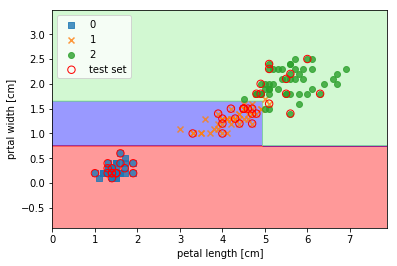

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)



X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('prtal width [cm]')
plt.legend(loc='upper left')
plt.show()

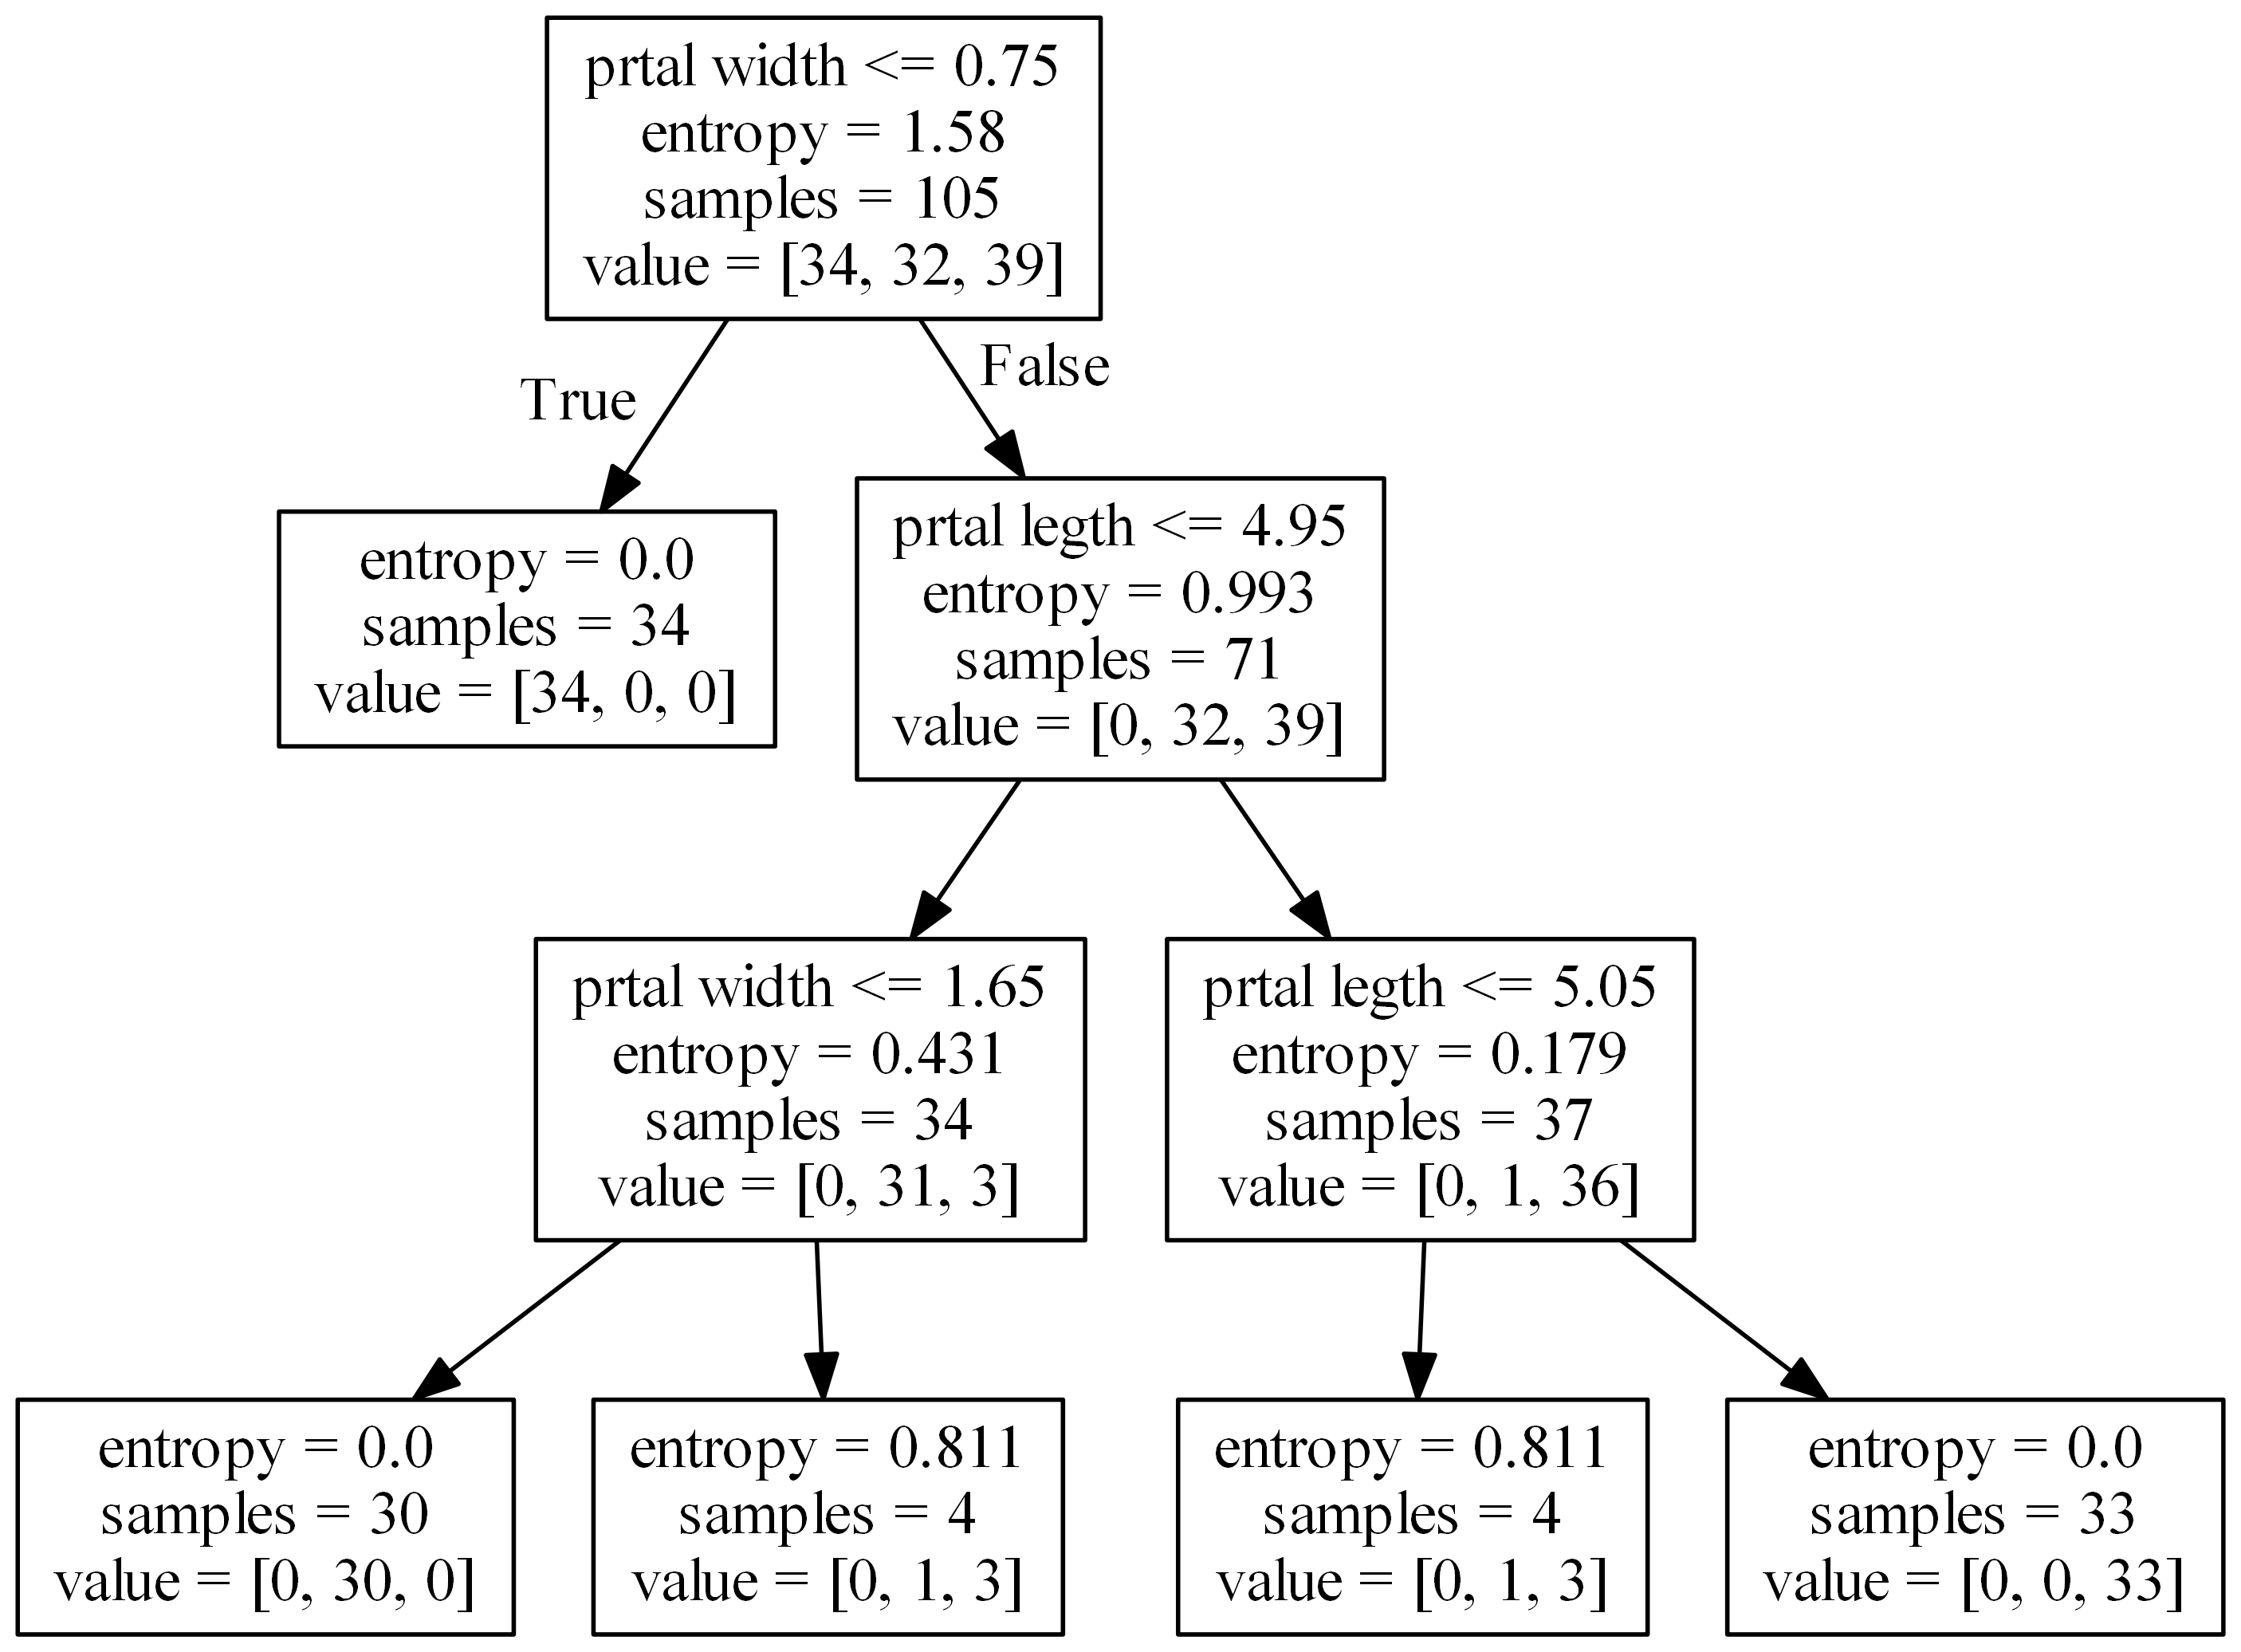

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['prtal legth', 'prtal width'])


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400'])

# 用于在jupyter notebook中显示出结果
from IPython.display import Image
Image(filename='tree.png')

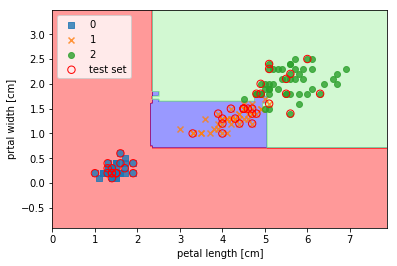

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('prtal width [cm]')
plt.legend(loc='upper left')
plt.show()

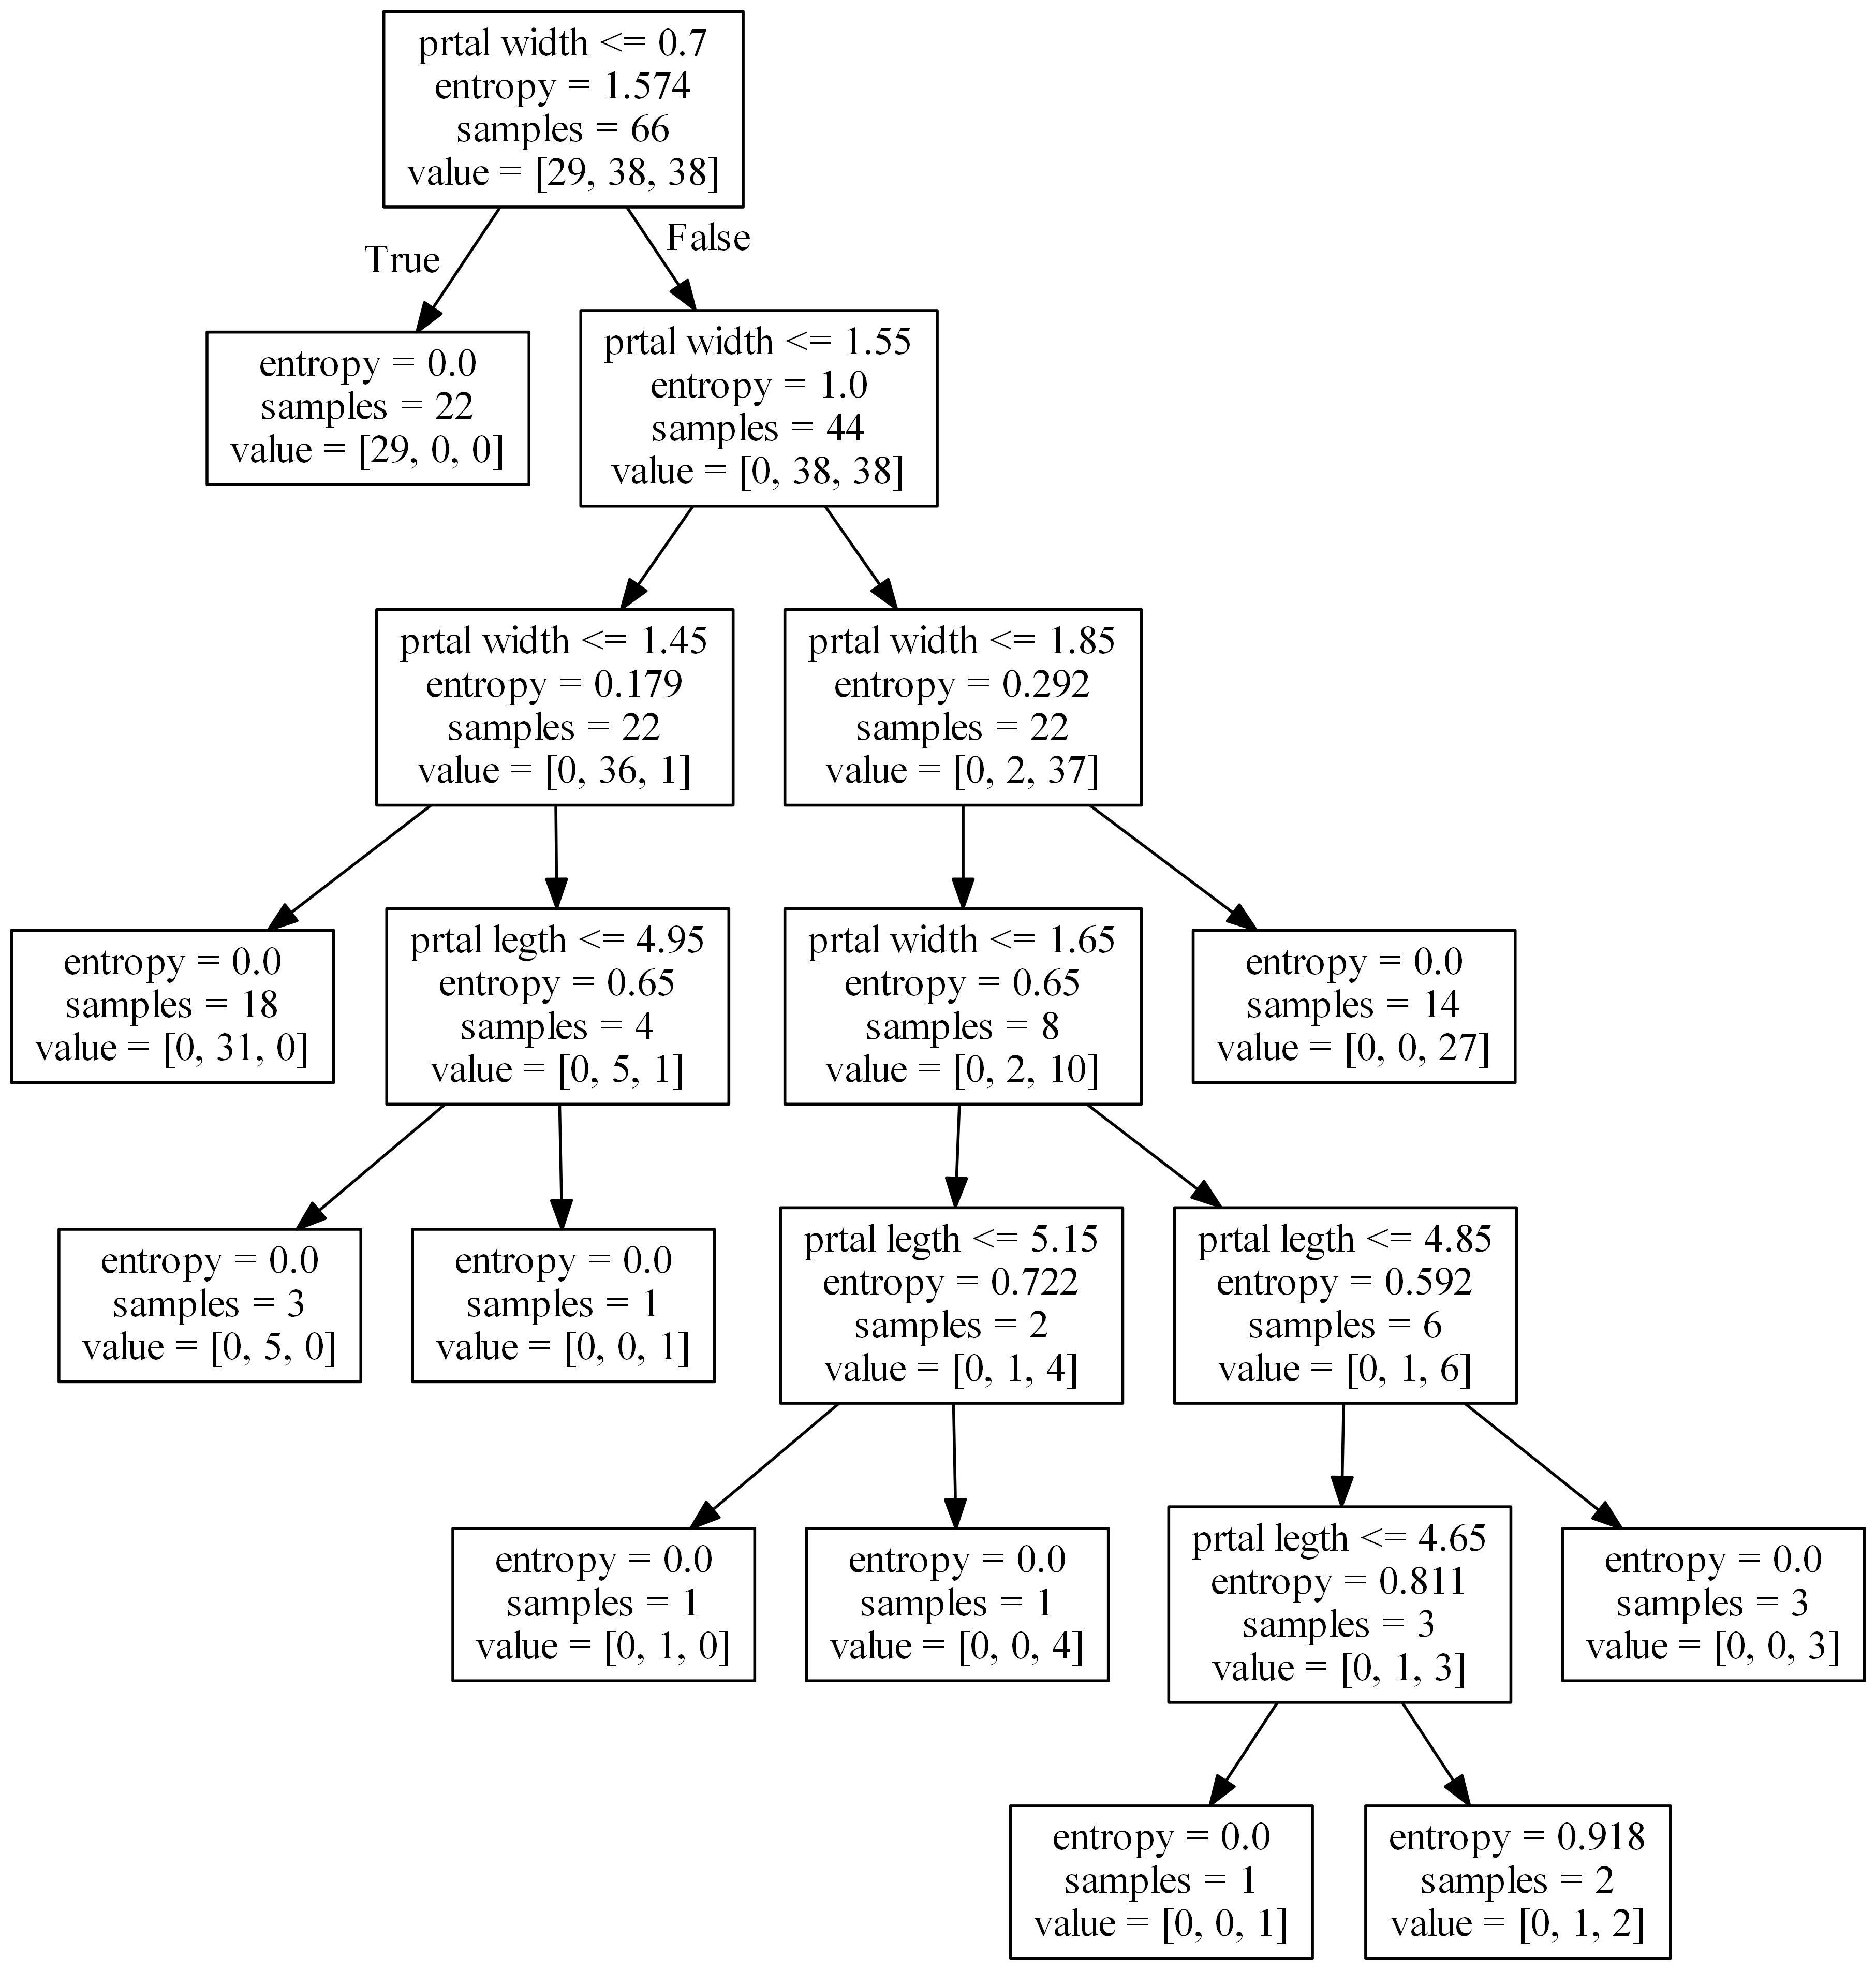

In [23]:
tree_ = forest.estimators_[5] # 从决策树从提取出一颗决策树

from sklearn.tree import export_graphviz
export_graphviz(tree_, out_file='tree_.dot', feature_names=['prtal legth', 'prtal width'])


from subprocess import call
call(['dot', '-Tpng', 'tree_.dot', '-o', 'tree_.png', '-Gdpi=400'])

# 用于在jupyter notebook中显示出结果
from IPython.display import Image
Image(filename='tree_.png')